In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(306281422)
data = pd.read_csv("banknote.csv", header=None)
dataset = np.array(data)

X = dataset[:, 0:4] 
X_1 = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_2 = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
y = dataset[:, 4]


Iteration 0: beta_0 = -0.0027696793002915457, beta_1 = -0.01800952799284723, beta_2 = -0.011048758206503062
Iteration 100: beta_0 = -0.45826362980068747, beta_1 = -2.962356703105691, beta_2 = -1.938287287379491
Iteration 200: beta_0 = -1.0744220913131082, beta_1 = -6.578680342281482, beta_2 = -4.311127590193802
Iteration 300: beta_0 = -1.7132929831897337, beta_1 = -10.234752868459617, beta_2 = -6.732849064755136
Iteration 400: beta_0 = -2.3535833794614827, beta_1 = -13.895469183956472, beta_2 = -9.170279846206453
Iteration 500: beta_0 = -2.9929977619181782, beta_1 = -17.556981395124843, beta_2 = -11.614565631899254
Iteration 600: beta_0 = -3.6318244015846544, beta_1 = -21.218471304137633, beta_2 = -14.062591034051383
Iteration 700: beta_0 = -4.270507124925314, beta_1 = -24.879671391632034, beta_2 = -16.51303212665694
Iteration 800: beta_0 = -4.909349598170158, beta_1 = -28.54047314375335, beta_2 = -18.965227234755694
Iteration 900: beta_0 = -5.548532188064019, beta_1 = -32.200832482374

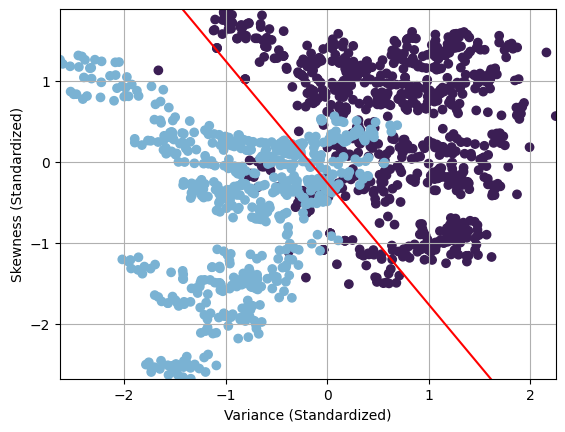

In [142]:
# Gradient Descent
beta_0 = 0
beta_12 = [0,0] 
lamb = 0.05
for rep in range(1000):
    linear_combination = beta_0 + (beta_12[0] * X_1) + (beta_12[1] * X_2)
    Temp = np.exp(-linear_combination)/(1+np.exp(-linear_combination))
    #Temp = 1/(1 + np.exp(-linear_combination))
    Temp_2 = y - Temp
    beta_0 += lamb * (Temp_2).mean(axis=0)
    beta_12[0] += lamb * (Temp_2 * X_1).mean(axis=0)
    beta_12[1] += lamb * (Temp_2 * X_2).mean(axis=0) 

    if rep % 100 == 0:
        print(f"Iteration {rep}: beta_0 = {beta_0}, beta_1 = {beta_12[0]}, beta_2 = {beta_12[1]}")

print(beta_0,beta_12)

plt.scatter(X_1, X_2, color=["#3B1E54" if i == 0 else "#7AB2D3" for i in y])
plt.xlabel("Variance (Standardized)")
plt.ylabel("Skewness (Standardized)")
X_new = np.linspace(min(X_1), max(X_1), 1000)
YY = (beta_0 + beta_12[0] * X_new) / -beta_12[1]
plt.plot(X_new, YY, color="red", label="Decision Boundary")
plt.xlim(min(X_1) , max(X_1))
plt.ylim(min(X_2), max(X_2))
plt.grid()
plt.show()

In [143]:
X_combined = np.column_stack((X_1, X_2))
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # Initialize and train the LDA model

y_pred_lda = lda.predict(X_test)

print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.8786407766990292
Confusion Matrix:
 [[214  15]
 [ 35 148]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       229
         1.0       0.91      0.81      0.86       183

    accuracy                           0.88       412
   macro avg       0.88      0.87      0.88       412
weighted avg       0.88      0.88      0.88       412



In [144]:
# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions
y_pred_qda = qda.predict(X_test)

# Evaluate the model
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("Classification Report:\n", classification_report(y_test, y_pred_qda))

QDA Accuracy: 0.8932038834951457
Confusion Matrix:
 [[218  11]
 [ 33 150]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       229
         1.0       0.93      0.82      0.87       183

    accuracy                           0.89       412
   macro avg       0.90      0.89      0.89       412
weighted avg       0.90      0.89      0.89       412



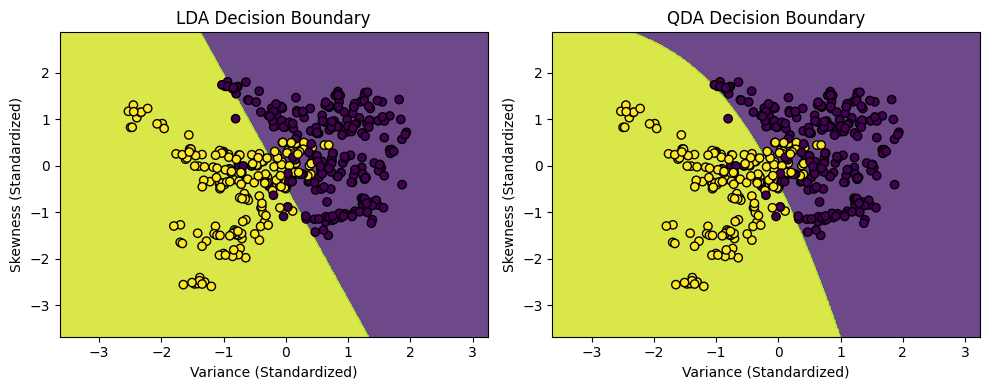

In [145]:
def plot_decision_boundaries(X, y, model, title, subplot_index):
    plt.subplot(subplot_index)
    x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
    y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Variance (Standardized)")
    plt.ylabel("Skewness (Standardized)")


plt.figure(figsize=(10, 4))
# Plot decision boundaries for LDA
plot_decision_boundaries(X_test, y_test, lda, "LDA Decision Boundary", 121)

# Plot decision boundaries for QDA
plot_decision_boundaries(X_test, y_test, qda, "QDA Decision Boundary", 122)

plt.tight_layout()
plt.show()